# Python Data Viz 101

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import random

## *Guide/Overview: All Basic Graphs and Data Viz*

## Distribution

### Violin

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/violin.html
- https://python-graph-gallery.com/violin-plot/
- https://python-charts.com/distribution/violin-plot-plotly/
- https://python-charts.com/distribution/violin-plot-matplotlib/
- https://python-charts.com/distribution/violin-plot-seaborn/
- *A violin plot allows you to visualize the distribution of a numeric variable for one or several groups. Seaborn is particularly adapted to build it thanks to its violin() function. Violin plots deserve more attention than boxplots, which can sometimes hide features of the data.*
- Example of violin chart with matplotlib: https://python-graph-gallery.com/web-ggbetweenstats-with-matplotlib/

In [5]:
df_violin = pd.read_excel(r"C:\Users\Al Raven\Documents\Datajournalism, viz, ... projects\Book1.xlsx",sheet_name="ChatGPT Inequality Dataset")

In [6]:
df_violin

Income          Category
0     38820.261730        Low Income
1     32000.786042        Low Income
2     34893.689921        Low Income
3     41204.465996        Low Income
4     39337.789951        Low Income
..             ...               ...
395  111925.389409  Very High Income
396  192896.196215  Very High Income
397  207055.093333  Very High Income
398  223328.935779  Very High Income
399  192627.596973  Very High Income

[400 rows x 2 columns]

In [7]:
sns.set(style="darkgrid") #setting a grey background

<Axes: xlabel='Category', ylabel='Income'>

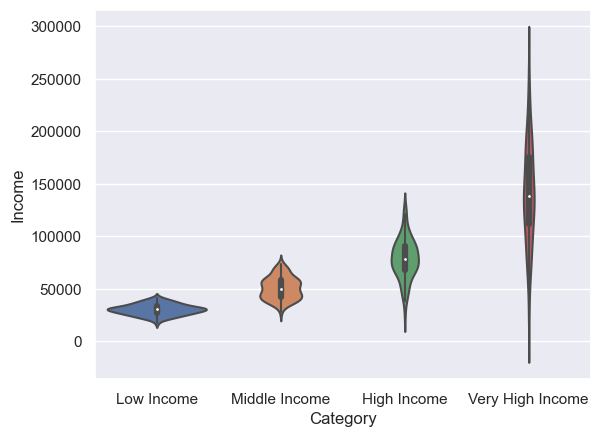

In [8]:
sns.violinplot( x=df_violin["Category"], y=df_violin["Income"] )

<Axes: xlabel='Income', ylabel='Category'>

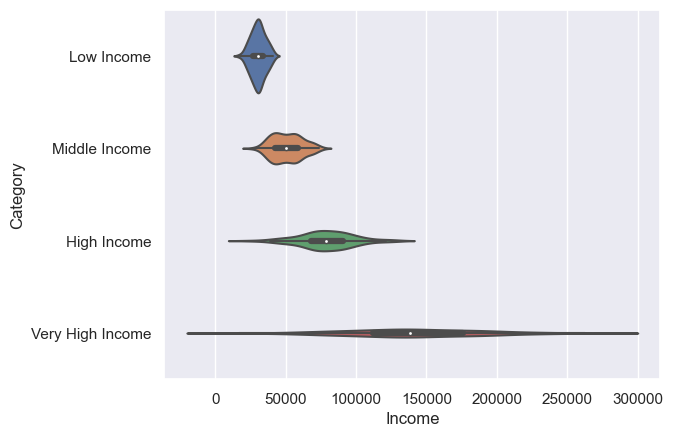

In [9]:
#switching x and y to make it horizontal 
#(this can help for reading the categorical labels)
sns.violinplot(x=df_violin["Income"],y=df_violin["Category"] ) 

Text(0.5, 1.0, 'Economic Inequality Violin Chart')

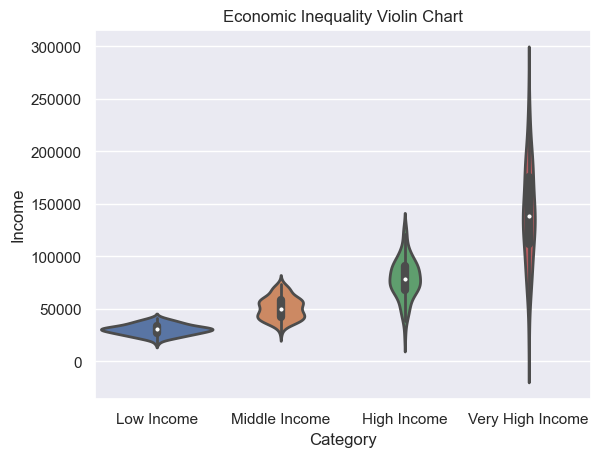

In [10]:
#customization: changing line width and general width
ax = sns.violinplot( x=df_violin["Category"], y=df_violin["Income"] 
              ,width=0.9
              ,linewidth=2)
ax.set_title('Economic Inequality Violin Chart')#adding title

Interactive violin chart with plotly

In [11]:
# Sample data
np.random.seed(5)
sample_violin = pd.DataFrame({'var': np.random.normal(0, 1, 500),
                   'group': random.choices(["G1", "G2", "G3"], k = 500)})

In [12]:
sample_violin

var group
0    0.441227    G1
1   -0.330870    G1
2    2.430771    G1
3   -0.252092    G3
4    0.109610    G2
..        ...   ...
495 -1.822749    G1
496 -0.239606    G3
497  0.728443    G1
498  0.608884    G3
499  0.773185    G1

[500 rows x 2 columns]

In [13]:
fig = px.violin(sample_violin, y = 'var', color = 'group')
fig.show()

In [14]:
fig = px.violin(df_violin,y='Income',color='Category')

In [15]:
fig.show()

In [16]:
fig.write_html(r"C:\Users\Al Raven\Pictures\Python data viz 101/Violin.html")

### Density

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/density.html
- https://python-graph-gallery.com/density-plot/
- https://python-charts.com/distribution/kernel-density-plot-seaborn/
- *Density plots allow you to visualize the distribution of a numeric variable for one or several groups. They are very well adapted for large datasets. Note that 2 approaches exist to build them in python: the first one consists of computing a kernel density estimate, and the second one involves building a high resolution histogram.*

In [17]:
df_density = df_violin

Text(0.5, 1.0, 'Distribution of Average National Incomes')

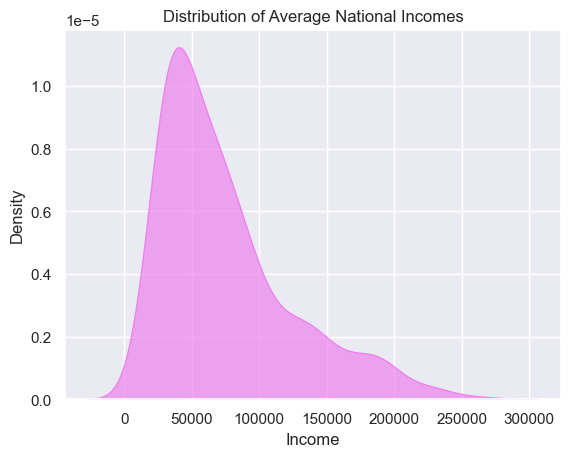

In [18]:
ax = sns.kdeplot(x=df_density["Income"],fill=True,color="violet", alpha=0.7)
ax.set_title('Distribution of Average National Incomes')

- it's also possible/common to compare the density of several groups, and there are several options to do it (see https://python-graph-gallery.com/density-plot/), including using the 'small multiple' method:

C:\Users\Al Raven\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



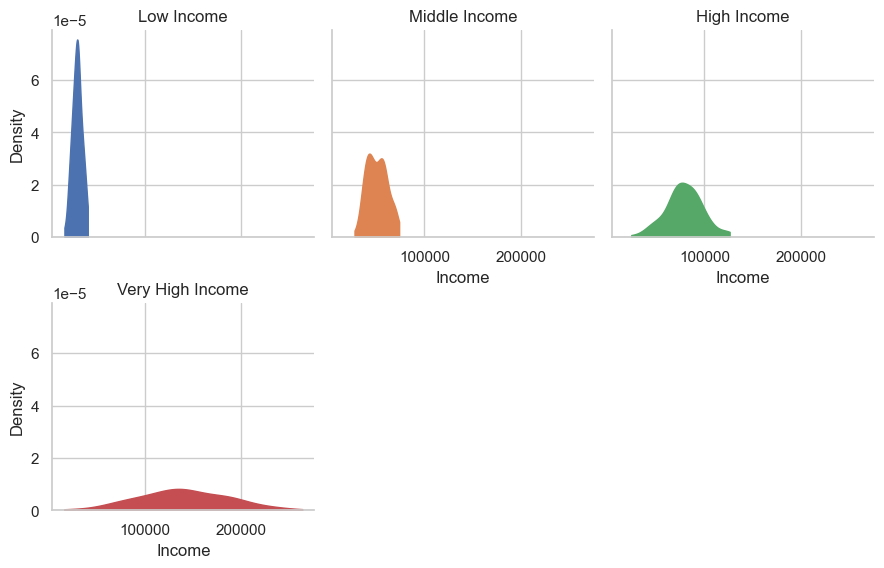

In [19]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(df_density, col='Category', hue='Category', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"Income", cut=0, fill=True, common_norm=False, alpha=1,
          legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

### Histogram

**Notes & Resources/Links:**  
- *A Histogram represents the distribution of a numeric variable for one or several groups. The values are split in bins, each bin is represented as a bar.*
- https://www.data-to-viz.com/graph/histogram.html
- https://python-graph-gallery.com/histogram/
- https://python-charts.com/distribution/histogram-plotly/
- https://python-charts.com/distribution/histogram-matplotlib/
- https://python-charts.com/distribution/histogram-group-seaborn/
- https://python-charts.com/distribution/histogram-density-seaborn/
- https://python-charts.com/distribution/histogram-seaborn/>

In [20]:
df_relation = pd.read_excel(r"C:\Users\Al Raven\Documents\Datajournalism, viz, ... projects\Book1.xlsx",sheet_name="NIBR 2019 Relat to Off (1)")

In [21]:
df_relation

Relat_Off  Number
0              Family Member   29154
1    Family Member and Other     917
2  Known to Victim and Other   59415
3                   Stranger    8259
4                  All Other   15217

In [22]:
#sorting in descending order
df_relation = df_relation.sort_values(['Number'],ascending=False)
df_relation

Relat_Off  Number
2  Known to Victim and Other   59415
0              Family Member   29154
4                  All Other   15217
3                   Stranger    8259
1    Family Member and Other     917

<Axes: xlabel='Number', ylabel='Relat_Off'>

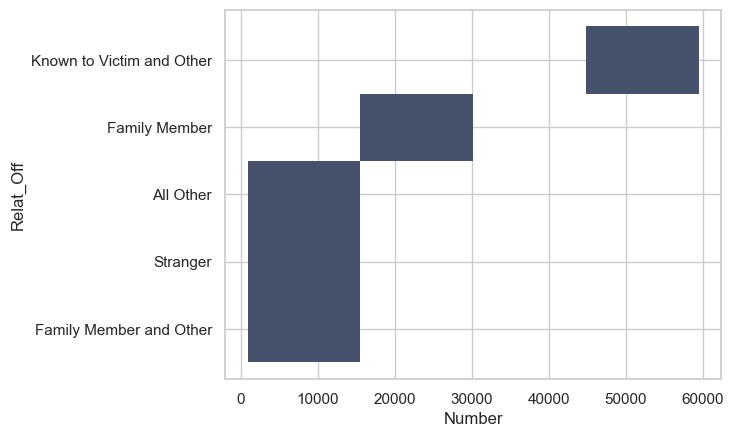

In [23]:
sns.histplot(x = df_relation['Number'],y=df_relation['Relat_Off'])

*Note: I'm not sure why the first two at the top aren't fully-filled bars, nor why the bars are sticked together without 
any separation...This should look more like this:*

<Axes: xlabel='Frequency'>

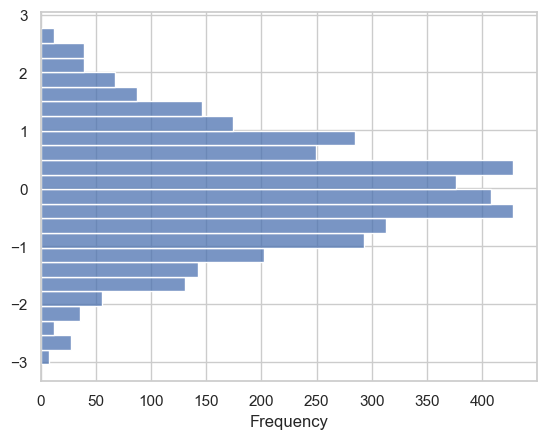

In [24]:
# Data simulation
rng = np.random.RandomState(0)
x = rng.normal(0, 1, size = 1000)
df = {'x': x}

sns.histplot(y = x, stat = "frequency")

### Boxplot

**Notes & Resources/Links:**  
- *A boxplot is an awesome way to summarize the distribution of a variable. However it hides the real distribution and the sample size.*
- https://www.data-to-viz.com/caveat/boxplot.html
- https://python-graph-gallery.com/boxplot/
- https://python-charts.com/distribution/box-plot-seaborn/
- https://python-charts.com/distribution/box-plot-matplotlib/
- https://python-charts.com/distribution/box-plot-plotly/

### Ridgeline

**Notes & Resources/Links:**  
- *A ridgeline plot (formerly called a Joyplot) A ridgeline summarizes the distribution of a numeric variable for several groups. Each group is represented as a density chart, each density chart overlapping each other to use space more efficiently.*
- https://www.data-to-viz.com/graph/ridgeline.html
- https://python-graph-gallery.com/ridgeline/
- https://python-charts.com/distribution/ridgeline-plot-matplotlib/
- https://seaborn.pydata.org/examples/kde_ridgeplot.html
- joypy:
    - https://github.com/leotac/joypy
    - https://webcache.googleusercontent.com/search?q=cache:https://medium.com/@lee_vaughan/build-beautiful-joy-plots-with-the-joypy-library-4d6896f4058a
    - https://fcpython.com/visualisation/joyplots-python-joypy
    - https://analyticsindiamag.com/a-hands-on-guide-to-joypy-for-drawing-interactive-joyplots/
    - https://webcache.googleusercontent.com/search?q=cache:https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052

In [25]:
df = pd.DataFrame({'var1': np.random.normal(70, 100, 500),
                   'var2': np.random.normal(250, 100, 500),
                   'group': random.choices(["G1", "G2", "G3", "G4", "G5"], k = 500)})

In [26]:
df

var1        var2 group
0    176.235383  304.276903    G3
1    117.350502  290.091230    G1
2    153.459787  321.970547    G2
3     64.585872  247.839510    G1
4     67.436031  252.403990    G1
..          ...         ...   ...
495  149.938890  363.351138    G4
496  147.302083  263.175650    G2
497   64.514426  237.199545    G3
498  101.690651  357.530689    G1
499   81.165757  316.555655    G3

[500 rows x 3 columns]

In [27]:
df_WID = pd.read_excel(r"C:\Users\Al Raven\Documents\Datajournalism, viz, ... projects\Book1.xlsx",sheet_name = "WID Income & Wealth per adult")

In [28]:
df_WID

Country  Avg national income per adult  \
0             Afghanistan                         2678.0   
1                 Albania                        12919.0   
2                 Algeria                        12397.0   
3                  Angola                         8855.0   
4     Antigua and Barbuda                        16710.0   
..                    ...                            ...   
200              Viet Nam                         9987.0   
201                 Yemen                         1439.0   
202                Zambia                         5198.0   
203              Zanzibar                         4208.0   
204              Zimbabwe                         3333.0   

     Avg national wealth per adult                         Region  
0                          11432.0          Russia & Central Asia  
1                          47939.0                         Europe  
2                          26382.0                         Africa  
3                           6634.0                         Africa  
4                          12666.0  Southern Americas & Caribbean  
..                             ...                            ...  
200                        42889.0         South & Southeast Asia  
201                         4078.0                    Middle East  
202                        26304.0                         Africa  
203                            NaN                         Africa  
204                        -1398.0                         Africa  

[205 rows x 4 columns]

In [29]:
df_WID.sort_values(by='Avg national wealth per adult',ascending=False)

Country  Avg national income per adult  \
177            Taiwan                        48833.0   
161         Singapore                        68811.0   
106        Luxembourg                        60329.0   
133            Norway                        56841.0   
175       Switzerland                        55786.0   
..                ...                            ...   
158            Serbia                        14721.0   
15            Belarus                        15018.0   
37    Channel Islands                            NaN   
96             Kosovo                        11665.0   
203          Zanzibar                         4208.0   

     Avg national wealth per adult                  Region  
177                       565317.0               East Asia  
161                       509742.0  South & Southeast Asia  
106                       480756.0                  Europe  
133                       471661.0                  Europe  
175                       451038.0                  Europe  
..                             ...                     ...  
158                       -22706.0                  Europe  
15                             NaN                  Europe  
37                             NaN       Oceania & Pacific  
96                             NaN                  Europe  
203                            NaN                  Africa  

[205 rows x 4 columns]

In [30]:
pip install joypy

  Using cached joypy-0.2.6-py2.py3-none-any.whl (8.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
import joypy

In [32]:
from matplotlib import cm

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000')])

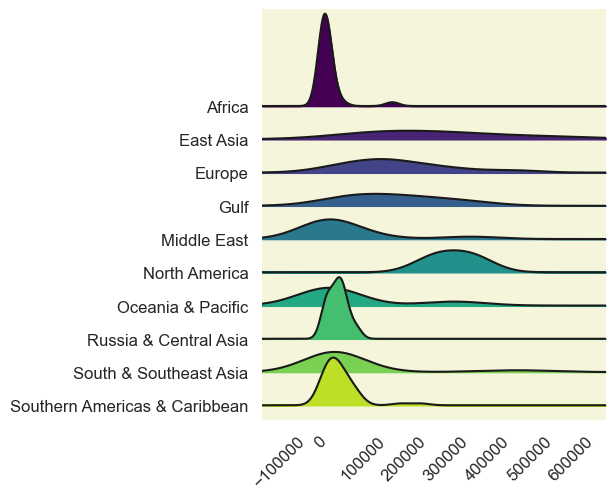

In [33]:
fig, ax = joypy.joyplot(df_WID, by = "Region", column = "Avg national wealth per adult",colormap = cm.viridis, background ="beige")
# Rotation of the bar names
plt.xticks(rotation=45)

The method with Seaborn and Plotly is more complicated: 
- https://seaborn.pydata.org/examples/kde_ridgeplot.html
- https://python-graph-gallery.com/ridgeline-graph-seaborn/
- https://python-graph-gallery.com/ridgeline-graph-plotly/

### Beeswarm

**Notes & Resources/Links:**  
- https://python-graph-gallery.com/beeswarm/
- https://python-charts.com/distribution/swarm-plot-seaborn/
- *The beeswarm chart is a very good alternative to the boxplot that hides the underlying dataset. However, do not try to use it with a very big dataset. Indeed, avoiding circle overlap will be possible with a small amount of data points, but it will get impossible otherwise. In this case, take a look to the violin chart instead.*
- Seaborn is the best way to make beeswarm plots in Python (with Matplotlib it's more difficult/requires more manual work)
- the Strip plot is a close cousin of the Swarm plot: https://python-charts.com/distribution/strip-plot-seaborn/

In [34]:
my_variable = np.random.normal(loc=10, scale=5, size=100)

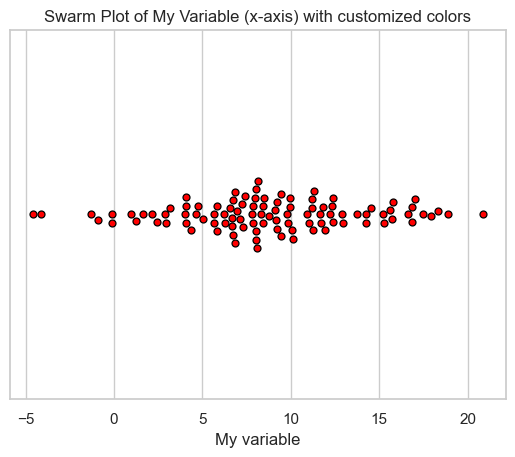

In [35]:
# Create the swarm plot
sns.swarmplot(x=my_variable,
              color='red', # Point color
              edgecolor='black', # Edge color
              linewidth=0.9, # Edge size
             )
plt.title("Swarm Plot of My Variable (x-axis) with customized colors")  # Set the title
plt.xlabel("My variable")  # Set the label for the x-axis
plt.show() # Display the chart

In [36]:
sample_size = 100  # Define the size of the random data samples.

data_group1 = np.random.normal(loc=2, scale=2, size=sample_size) # Generate data points for 'Group 1'
data_group2 = np.random.normal(loc=5, scale=2, size=sample_size) # Generate data points for 'Group 2'
data_combined = np.concatenate([data_group1, data_group2]) # Concatenate the data to create a combined dataset

category_feature = ['Group 1'] * sample_size + ['Group 2'] * sample_size # List that indicates the category for each data point

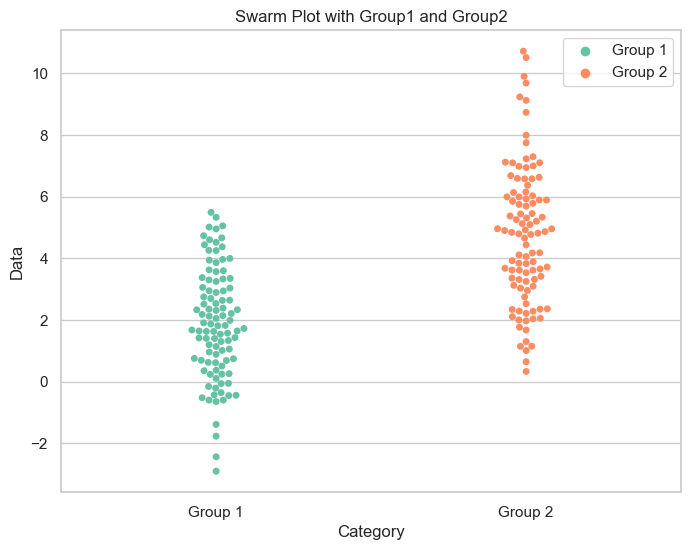

In [37]:
# Create swarm plots
plt.figure(figsize=(8, 6))
sns.swarmplot(x=category_feature, # Group labels
              y=data_combined, # Numeric variable
              palette='Set2', # Color set used
              hue=category_feature, # Add a legend
             )
plt.title('Swarm Plot with Group1 and Group2')
plt.xlabel('Category')
plt.ylabel('Data')
plt.show()

***

## Correlation

### Scatterplot

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/scatter.html
- https://python-graph-gallery.com/scatter-plot/
- https://python-charts.com/correlation/scatter-plot-matplotlib/
- https://python-charts.com/correlation/scatter-plot-marginal-histograms-seaborn/
- https://python-charts.com/correlation/scatter-plot-group-seaborn/
- https://python-charts.com/correlation/scatter-plot-regression-line-seaborn/
- https://python-charts.com/correlation/scatter-plot-seaborn/
- https://python-charts.com/correlation/scatter-plot-plotly/
- https://python-charts.com/correlation/3d-scatter-plot-matplotlib/
- Bokeh: https://docs.bokeh.org/en/latest/docs/user_guide/basic/scatters.html#ug-basic-scatters
- *The main danger with scatterplots is overplotting. When the sample size gets big, circles tend to overlap, making the figure unreadable.Several workarounds exist to fix the issue, like using opacity or switching to another chart type*

I'm only doing the basics here, there's a lot more in the links above

***Seaborn***

In [38]:
df_WID

Country  Avg national income per adult  \
0             Afghanistan                         2678.0   
1                 Albania                        12919.0   
2                 Algeria                        12397.0   
3                  Angola                         8855.0   
4     Antigua and Barbuda                        16710.0   
..                    ...                            ...   
200              Viet Nam                         9987.0   
201                 Yemen                         1439.0   
202                Zambia                         5198.0   
203              Zanzibar                         4208.0   
204              Zimbabwe                         3333.0   

     Avg national wealth per adult                         Region  
0                          11432.0          Russia & Central Asia  
1                          47939.0                         Europe  
2                          26382.0                         Africa  
3                           6634.0                         Africa  
4                          12666.0  Southern Americas & Caribbean  
..                             ...                            ...  
200                        42889.0         South & Southeast Asia  
201                         4078.0                    Middle East  
202                        26304.0                         Africa  
203                            NaN                         Africa  
204                        -1398.0                         Africa  

[205 rows x 4 columns]

Text(0.5, 1.0, 'International Wealth & Income Inequality in 2021')

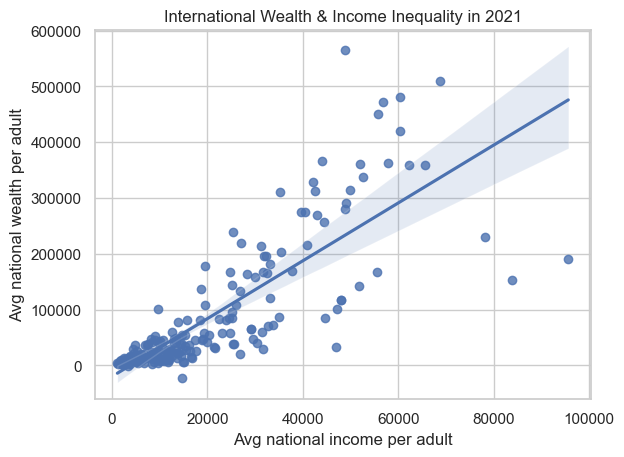

In [39]:
ax=sns.regplot(x=df_WID["Avg national income per adult"],y=df_WID["Avg national wealth per adult"])
ax.set_title('International Wealth & Income Inequality in 2021')

C:\Users\Al Raven\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



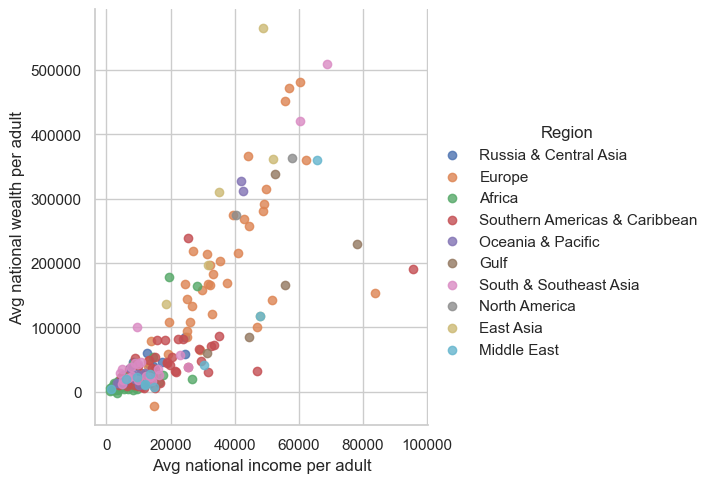

In [40]:
ax = sns.lmplot(data=df_WID,x="Avg national income per adult",y="Avg national wealth per adult",
                hue="Region",fit_reg=False)

***Matplotlib***

*Matplotlib also requires only a few lines of code to draw a scatterplot thanks to its plot() function. The resulting chart is not as good-looking, but the function probably offers more flexibility in term of customization.*

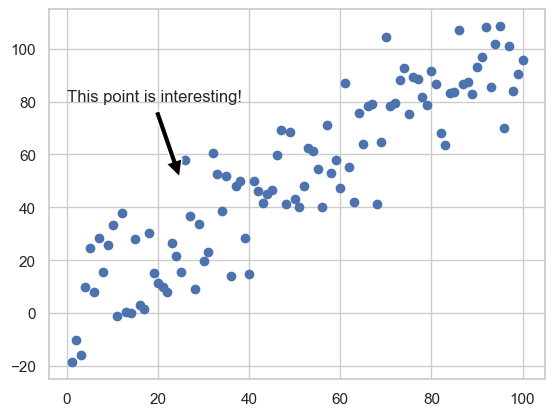

In [41]:
#Data
df=pd.DataFrame({'x_pos': range(1,101), 'y_pos': np.random.randn(100)*15+range(1,101) })

# Basic chart
plt.plot('x_pos', 'y_pos', data=df,  linestyle='none', marker='o')
 
# Annotate with text + Arrow
plt.annotate(
# Label and coordinate
'This point is interesting!', xy=(25, 50), xytext=(0, 80),
 
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05))

# Show the graph
plt.show()

***Pandas***

<Axes: title={'center': 'International Wealth & Income Inequality in 2021'}, xlabel='Avg national income per adult', ylabel='Avg national wealth per adult'>

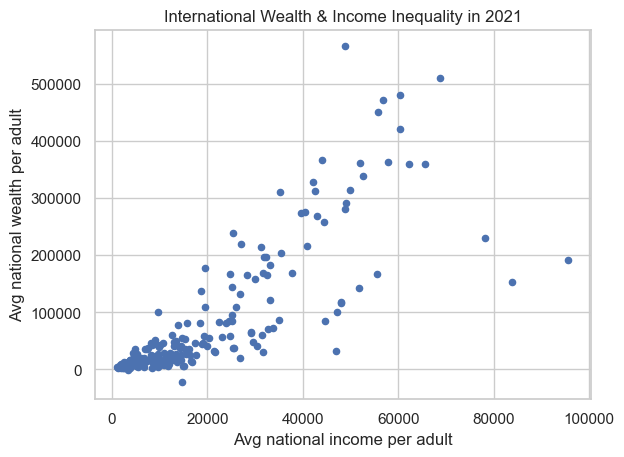

In [42]:
df_WID.plot.scatter('Avg national income per adult','Avg national wealth per adult',
                    title='International Wealth & Income Inequality in 2021')

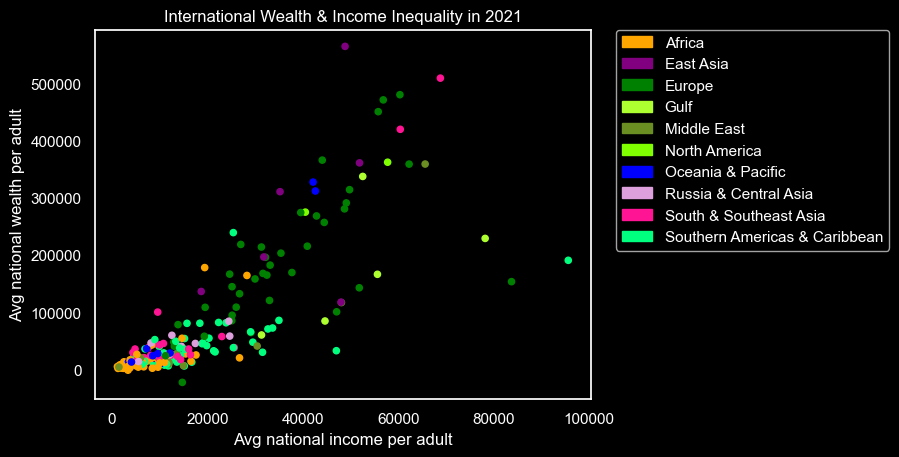

In [43]:
import matplotlib.patches as mpatches
# Get color for each data point
colors = {'Africa': 'orange', 'East Asia': 'purple','Europe':'green','Gulf':'greenyellow',
          'Middle East':'olivedrab','North America':'chartreuse','Oceania & Pacific':'blue',
          'Russia & Central Asia':'plum','South & Southeast Asia':'deeppink',
         'Southern Americas & Caribbean':'springgreen'}
color_list = [colors[group] for group in df_WID['Region']]

plt.style.use('dark_background')

# Create a scatter plot with color-coding based on 'categorical_variable'
ax = df_WID.plot.scatter('Avg national income per adult',
                'Avg national wealth per adult',
                c=color_list,
                grid=False,
                title='International Wealth & Income Inequality in 2021')

# Create legend handles, labels for each group and add legend to the plot
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color=colors['Africa'], label='Africa'),
    mpatches.Patch(color=colors['East Asia'], label='East Asia'), 
    mpatches.Patch(color=colors['Europe'], label='Europe'), 
    mpatches.Patch(color=colors['Gulf'], label='Gulf'), 
    mpatches.Patch(color=colors['Middle East'], label='Middle East'), 
    mpatches.Patch(color=colors['North America'], label='North America'), 
    mpatches.Patch(color=colors['Oceania & Pacific'], label='Oceania & Pacific'), 
    mpatches.Patch(color=colors['Russia & Central Asia'], label='Russia & Central Asia'), 
    mpatches.Patch(color=colors['South & Southeast Asia'], label='South & Southeast Asia'), 
    mpatches.Patch(color=colors['Southern Americas & Caribbean'], label='Southern Americas & Caribbean'), 
]
ax.legend(handles=legend_handles,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


plt.show()

***Plotly***  
*Interactivity is a real plus for scatterplots. It is very useful to have a tooltip associated to every markers to get some additional information about it. Zooming on a specific area of the scatterplot is also very valuable sometimes.*

In [44]:
# Create a dictionary to map categories to colors
category_colors = {'Africa': 'orange', 'East Asia': 'purple','Europe':'green','Gulf':'greenyellow',
          'Middle East':'olivedrab',
          'North America':'chartreuse','Oceania & Pacific':'blue',
          'Russia & Central Asia':'plum','South & Southeast Asia':'deeppink',
          'Southern Americas & Caribbean':'springgreen'}

# Create the figure (for the moment: a blank graph)
fig = go.Figure()

# Add the scatter trace
for category, color in category_colors.items():
    category_data = df_WID[df_WID['Region'] == category]
    fig.add_trace(go.Scatter( 
        x=category_data['Avg national income per adult'], # Variable in the x-axis
        y=category_data['Avg national wealth per adult'], # Variable in the y-axis
        mode='markers', # This explicitly states that we want our observations to be represented by points
        name=category,
        
        # Properties associated with points 
        marker=dict(
            size=12, # Size
            color=color, # Color
            opacity=0.8, # Point transparency 
            line=dict(width=1, color='black') # Properties of the edges
        ),
    ))

# Customize the layout
fig.update_layout(
    title='International Wealth & Income Inequality in 2021', # Title
    xaxis_title='Avg national income per adult', # x-axis name
    yaxis_title='Avg national wealth per adult', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)


In [45]:
fig.write_html(r"C:\Users\Al Raven\Pictures\Python data viz 101/WID scatterplot.html")

Matplotlib's scatterplot function (plt.scatter()) is the basis of football data visualizations based on event data, i.e. where certain events (passes, goals, shots, etc) from a game are plotted onto a football pitch. Here is an [example](https://www.kaggle.com/code/josegabrielgonzalez/understat-series-shotmaps) using the function as such:

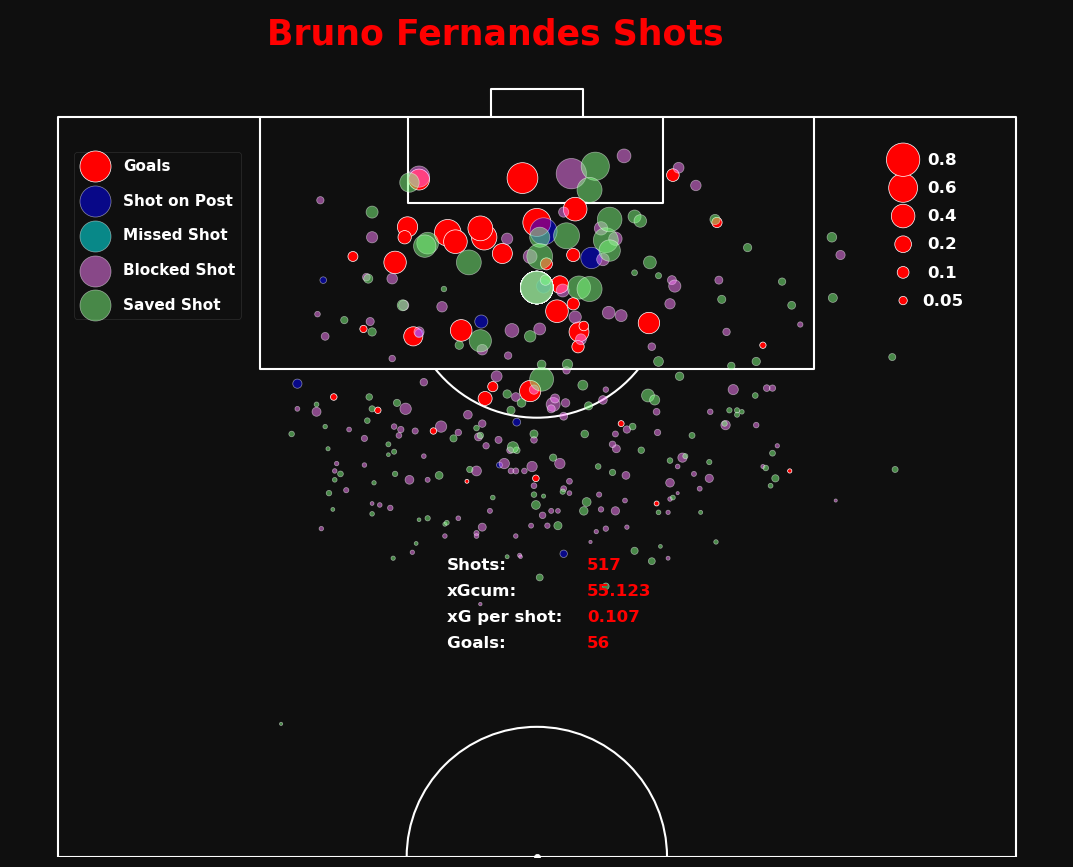

It's not merely dots/circles/bubbles that can be plotted: once the dots are plotted (they're mapped on a pitch, but it's the same thing as if it was a simple/standard chart with two axes...), you can make arrows to map passes, for instance.  
The *mplsoccer library* is the most common tool for creatin such football data viz, and it's based/rooted in maplotlib:

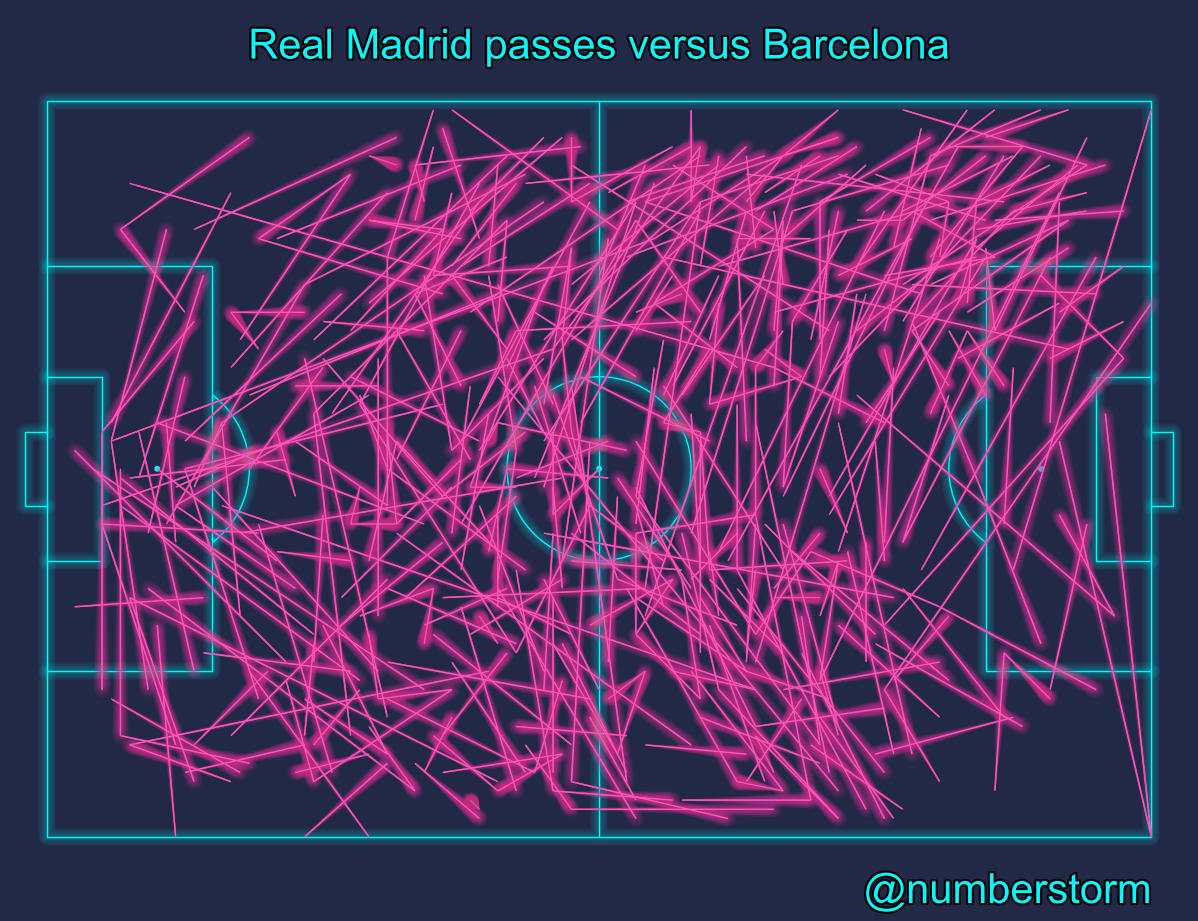

In [46]:
#importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mplsoccer import Sbopen, Pitch
from matplotlib import colors
import matplotlib.patheffects as path_effects
# read data from Statsbomb
parser = Sbopen()
df, related, freeze, tactics = parser.event(16196)

# get the team names
team1, team2 = df.team_name.unique()
# filter the dataset to completed passes for team 1
mask_team1 = (df.type_name == 'Pass') & (df.team_name == team1) & (df.outcome_name.isnull())
df_pass = df.loc[mask_team1, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]

LINEWIDTH = 1  # starting linewidth
DIFF_LINEWIDTH = 1.2  # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider

# in each loop, for the glow, we plot the alpha divided by the num_glow_lines
# I have a lower alpha_pass_line value as there is a slight overlap in
# the pass comet lines when using capstyle='round'
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15

# The colors are borrowed from mplcyberpunk. Try some of the following alternatives
# '#08F7FE' (teal/cyan), '#FE53BB' (pink), '#F5D300' (yellow),
# '#00ff41' (matrix green), 'r' (red), '#9467bd' (viloet)
BACKGROUND_COLOR = '#212946'
PASS_COLOR = '#FE53BB'
LINE_COLOR = '#08F7FE'

# plot as initial pitch and the lines with alpha=1
# I have used grid to get a title and endnote axis automatically, but you could you pitch.draw()
pitch = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR, linewidth=LINEWIDTH,
              line_alpha=1, goal_alpha=1, goal_type='box')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
fig.set_facecolor(BACKGROUND_COLOR)
pitch.lines(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y,
            capstyle='butt',  # cut-off the line at the end-location.
            linewidth=LINEWIDTH, color=PASS_COLOR, comet=True, ax=ax['pitch'])

# plotting the titles and endnote
text_effects = [path_effects.Stroke(linewidth=3, foreground='black'),
                path_effects.Normal()]
ax['title'].text(0.5, 0.3, f'{team1} passes versus {team2}',
                 path_effects=text_effects,
                 va='center', ha='center', color=LINE_COLOR, fontsize=30)
ax['endnote'].text(1, 0.5, '@numberstorm', va='center', path_effects=text_effects,
                   ha='right', color=LINE_COLOR, fontsize=30)

# plotting the glow effect. it is essentially a loop that plots the line with
# a low alpha (transparency) value and gradually increases the linewidth.
# This way the center will have more color than the outer area.
# you could break this up into two loops if you wanted the pitch lines to have wider glow
for i in range(1, NUM_GLOW_LINES + 1):
    pitch = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR,
                  linewidth=LINEWIDTH + (DIFF_LINEWIDTH * i),
                  line_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_type='box')
    pitch.draw(ax=ax['pitch'])  # we plot on-top of our previous axis from pitch.grid
    pitch.lines(df_pass.x, df_pass.y,
                df_pass.end_x, df_pass.end_y,
                linewidth=LINEWIDTH + (DIFF_LINEWIDTH * i),
                capstyle='round',  # capstyle round so the glow extends past the line
                alpha=ALPHA_PASS_LINE / NUM_GLOW_LINES,
                color=PASS_COLOR, comet=True, ax=ax['pitch'])


It's also possible - when analyzing leagues/competitions - to replace the dots in a scatterplot by the team logos: https://fcpython.com/visualisation/creating-scatter-plots-with-club-logos-in-python

### Heatmap

**Notes & Resources/Links:**  
- *A heatmap is a graphical representation of data where each value of a matrix is represented as a color.*
- https://www.data-to-viz.com/graph/heatmap.html
- https://python-graph-gallery.com/heatmap/
- Seaborn:
    - https://python-charts.com/correlation/clustermap-seaborn/
    - https://python-charts.com/correlation/heatmap-seaborn/
    - https://python-graph-gallery.com/90-heatmaps-with-various-input-format/
    - https://python-graph-gallery.com/91-customize-seaborn-heatmap/
    - https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
    - https://python-graph-gallery.com/94-use-normalization-on-seaborn-heatmap/
- Matplotlib:
    - https://python-charts.com/correlation/heatmap-matplotlib/
- Plotly:
    - https://python-charts.com/correlation/heatmap-plotly/
    - https://plotly.com/python/heatmaps/

In football analytics, a relatively simple example is [pass heatmaps](https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassHeatMap.html) (again the mplsoccer library and functions are based on matplotlib...):

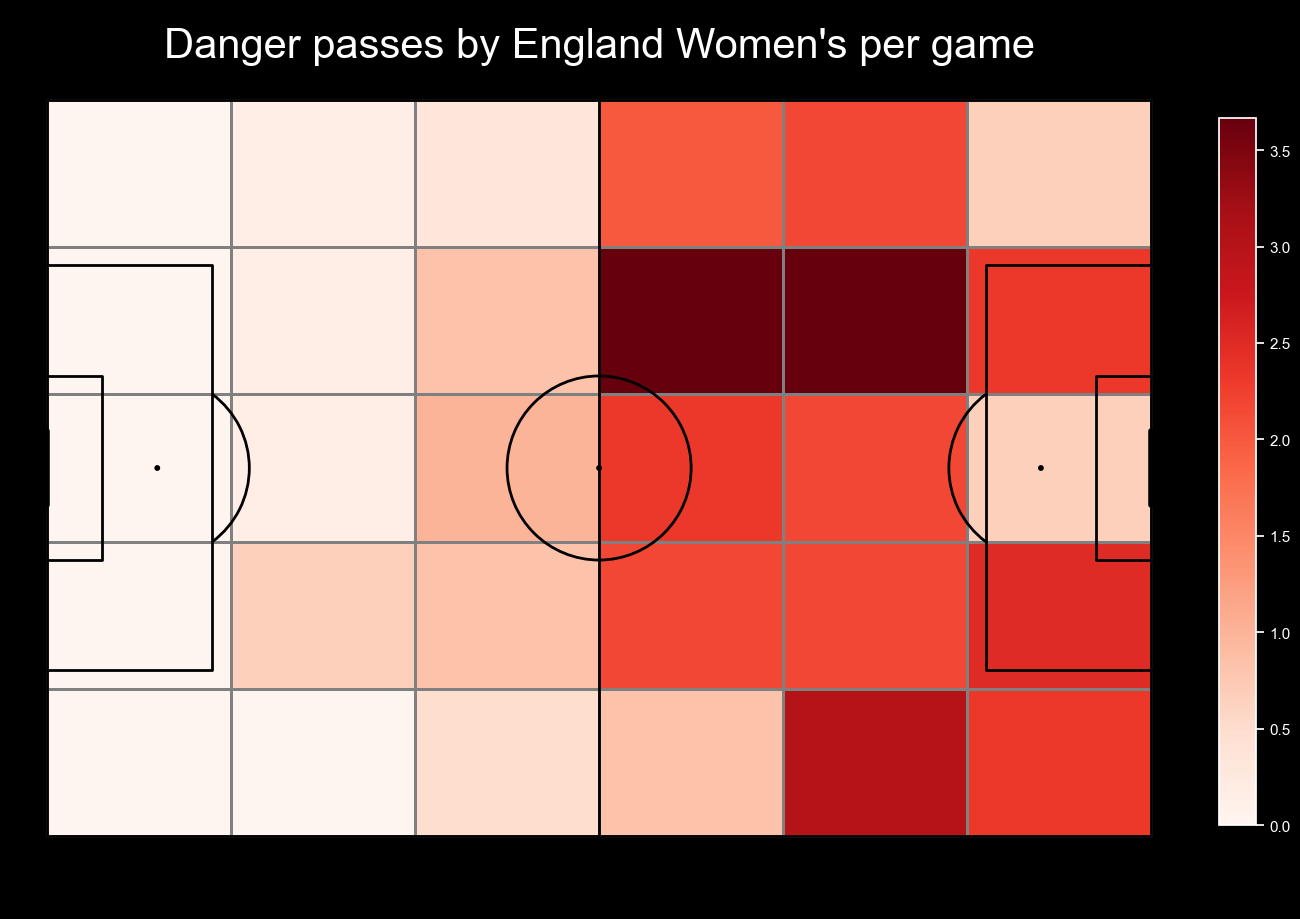

In [47]:
#open the data
parser = Sbopen()
df_match = parser.match(competition_id=53, season_id=106)
#our team
team = "England Women's"
#get list of games by our team, either home or away
match_ids = df_match.loc[(df_match["home_team_name"] == team) | (df_match["away_team_name"] == team)]["match_id"].tolist()
#calculate number of games
no_games = len(match_ids)

#declare an empty dataframe
danger_passes = pd.DataFrame()
for idx in match_ids:
    #open the event data from this game
    #Note that we use the [0] to store only event data.
    df = parser.event(idx)[0]
    for period in [1, 2]: #we iterate for each period (because there can be additional shots within added time)
        #keep only accurate passes by England that were not set pieces in this period
        mask_pass = (df.team_name == team) & (df.type_name == "Pass") & (df.outcome_name.isnull()) & (df.period == period) & (df.sub_type_name.isnull())
        #keep only necessary columns
        passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
        #keep only Shots by England in this period
        mask_shot = (df.team_name == team) & (df.type_name == "Shot") & (df.period == period)
        #keep only necessary columns
        shots = df.loc[mask_shot, ["minute", "second"]]
        #convert time to seconds
        shot_times = shots['minute']*60+shots['second']
        shot_window = 15
        #find starts of the window
        shot_start = shot_times - shot_window
        #condition to avoid negative shot starts
        shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
        #convert to seconds
        pass_times = passes['minute']*60+passes['second']
        #check if pass is in any of the windows for this half
        pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x < shot_times)).unique())

        #keep only danger passes
        danger_passes_period = passes.loc[pass_to_shot]
        #concatenate dataframe with a previous one to keep danger passes from the whole tournament
        # = creating a dataframe w/ all danger passes
        danger_passes = pd.concat([danger_passes, danger_passes_period], ignore_index = True)
        
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram
bin_statistic = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_games
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Danger passes by ' + team + " per game", fontsize = 30)
plt.show()

A more advanced example/application of matplotlib heatmaps is [Expected Threat models](https://soccermatics.readthedocs.io/en/latest/gallery/lesson4/plot_ExpectedThreat.html), which try to measure and value the attacking effect/impact of actions, and how certain types and sequences of actions at specific locations across the pitch impact the attacking "threat" or probability to produce a goal or goalscoring chance.

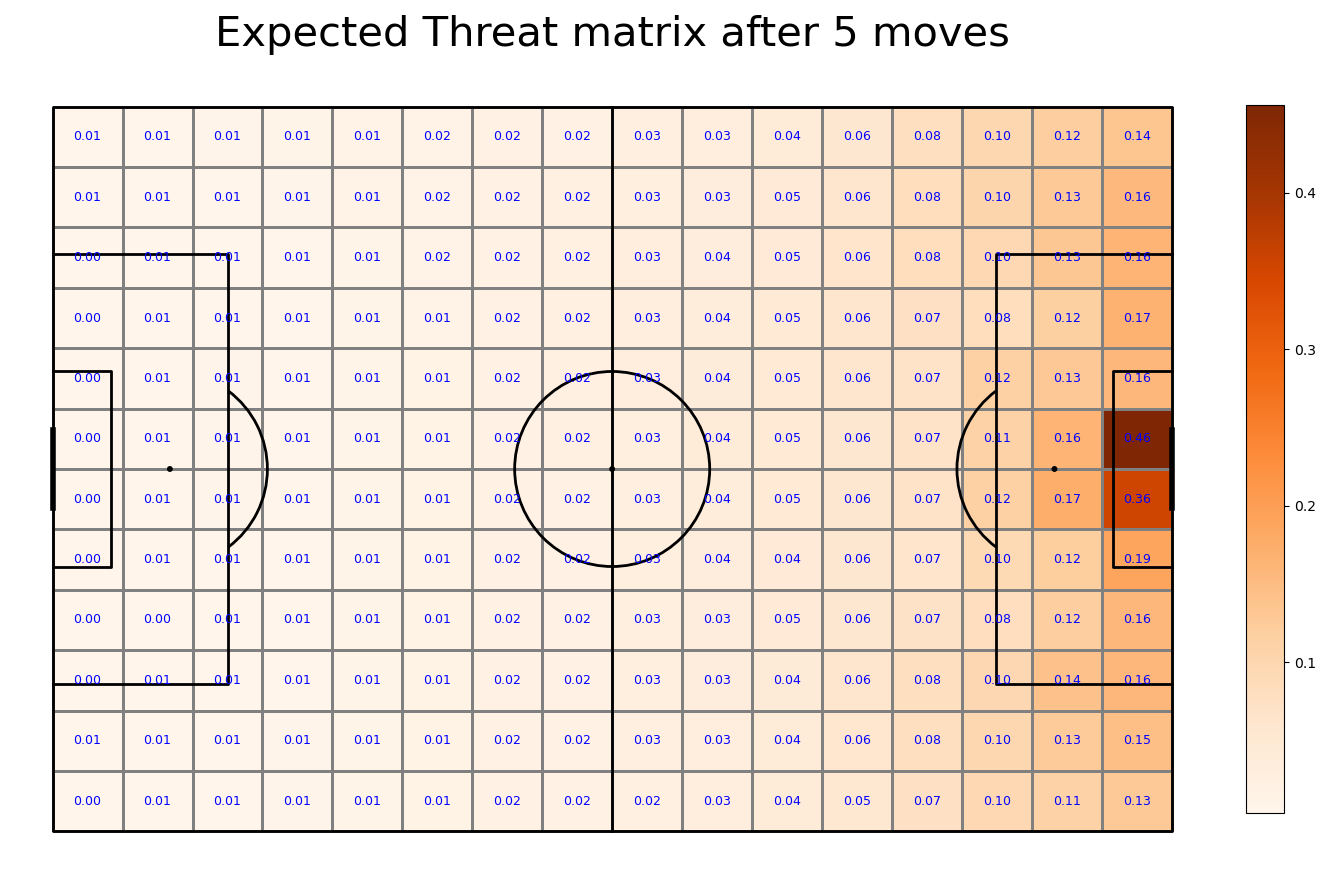

Here's a slightly more accessible starting point, this time concerning [Expected Goals](https://soccermatics.readthedocs.io/en/latest/gallery/lesson2/plot_xGModelFit.html):

In [48]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

#load data - store it in train dataframe
train = pd.DataFrame()
for i in range(13):
    #file_name = 'events_France_' + str(i+1) + '.json'
    #path = os.path.join(str(pathlib.Path().resolve().parents[0]), 'data', 'Wyscout', file_name)
    path = r"C:\Users\Al Raven\Documents\Football\Free Wyscout data\events wyscout\events_France.json"
    with open(path) as f:
        data = json.load(f)
    train = pd.concat([train, pd.DataFrame(data)])
    
##data prep##

#Exepcted goals model is build using only shots, so we keep only 
#those actions for which subEventName was Shot. 
shots = train.loc[train['subEventName'] == 'Shot']

#we store the coordinates of a shot transformed to 105 x 68 pitch
#get shot coordinates as separate columns

shots["X"] = shots.positions.apply(lambda cell: (100 - cell[0]['x']) * 105/100)
shots["Y"] = shots.positions.apply(lambda cell: cell[0]['y'] * 68/100)
shots["C"] = shots.positions.apply(lambda cell: abs(cell[0]['y'] - 50) * 68/100)
#calculate distance and angle
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)
shots["Angle"] = np.where(np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)) > 0, np.arctan(7.32 * shots["X"] /(shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)), np.arctan(7.32 * shots["X"] /(shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)) + np.pi)

#Also, we treat the goal as x = 0. Created C is an auxillary variable 
#to help us calculate distance and angle. It is the distance from 
#a point to the horizontal line through the middle of the pitch. 
#We calculate the distance to the goal as the distance on Euclidean 
#plane (see Distance in R2). and angle using the formula from 
#The Geometry of Shooting. Moreover, we need an information if a goal 
#was scored. It can be found in the tags column - if in this column 
#exists {id: 101}.
#if you ever encounter problems (like you have seen that model treats 0 as 1 and 1 as 0) while modelling - change the dependant variable to object
shots["Goal"] = shots.tags.apply(lambda x: 1 if {'id':101} in x else 0).astype(object)

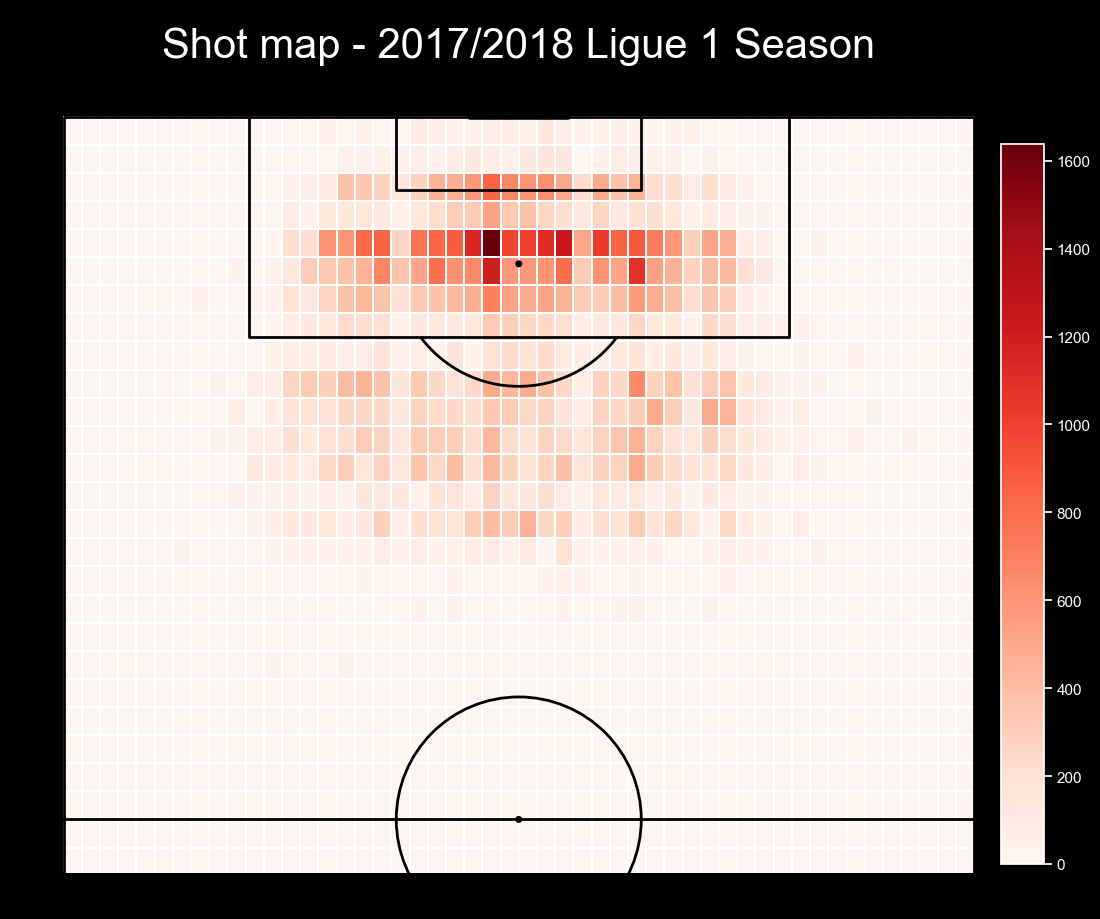

In [49]:
##plotting shot location###

#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#subtracting x from 105 but not y from 68 because of inverted Wyscout axis
#calculate number of shots in each bin
bin_statistic_shots = pitch.bin_statistic(105 - shots.X, shots.Y, bins=50)
#make heatmap
pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0.01)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot map - 2017/2018 Ligue 1 Season' , fontsize = 30)
plt.show()

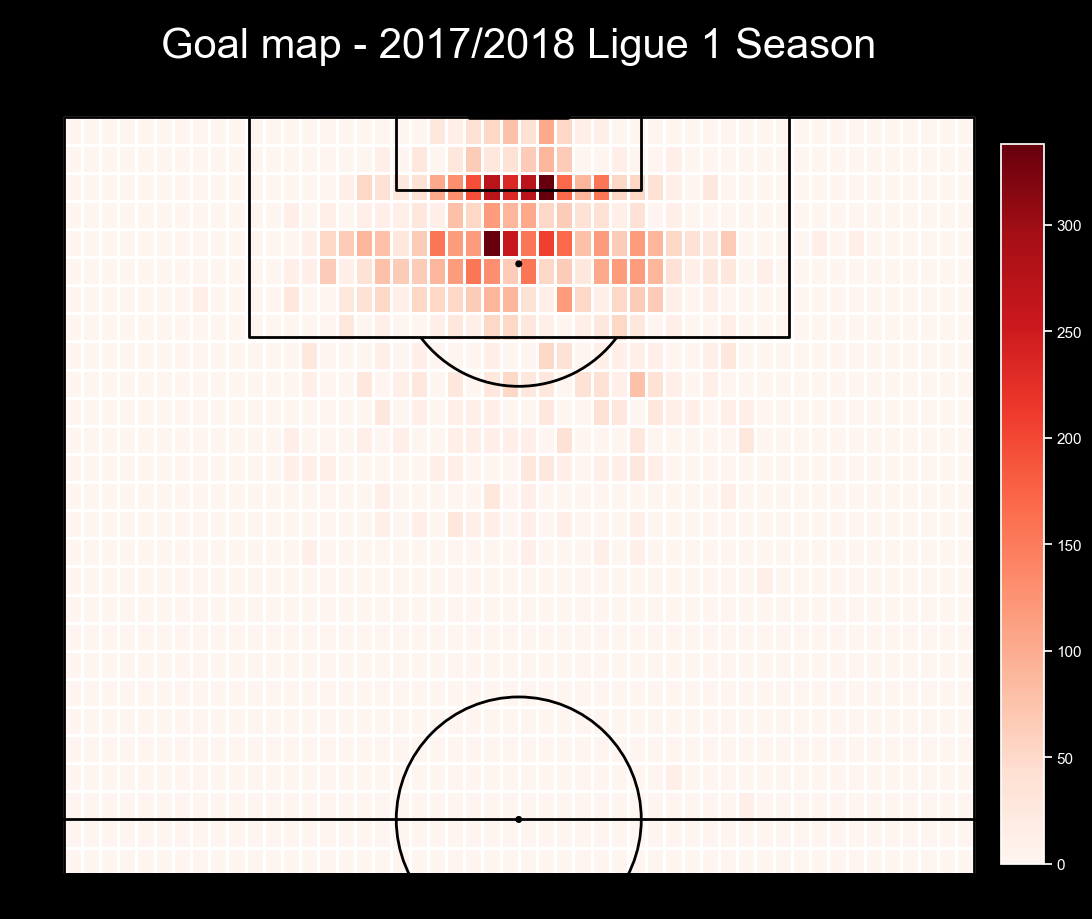

In [50]:
##plotting goal location##

#take only goals
goals = shots.loc[shots["Goal"] == 1]
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#calculate number of goals in each bin
bin_statistic_goals = pitch.bin_statistic(105 - goals.X, goals.Y, bins=50)
#plot heatmap
pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Reds', edgecolor='white')
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal map - 2017/2018 Ligue 1 Season' , fontsize = 30)
plt.show()

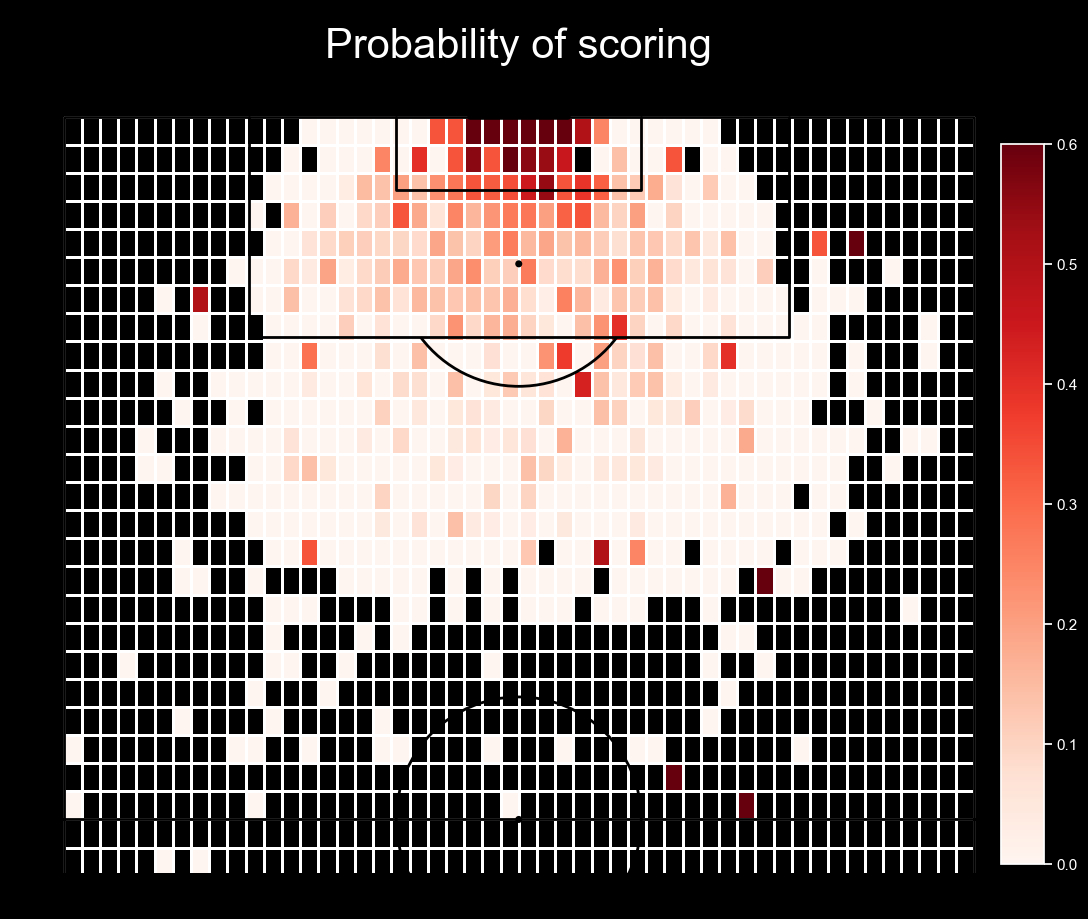

In [51]:
##Plotting the probability of scoring a goal given the location

#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots.X, shots.Y, bins = 50)
#normalize number of goals by number of shots
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show()

*note: there's definitely some kind of error/bug/outlier for the locations outside of the box that have a high probability... Or maybe if one or two rare freakish goals got scored from these places during that season, did that skew the probability calculations?? I don't know but it's surprising/incongruent...*

### Correlogram

(or pairs plot, or pairwise plot, or correlation matrix)

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/correlogram.html
- https://python-charts.com/correlation/pairs-plot-seaborn/
- https://python-graph-gallery.com/correlogram/
- https://python-graph-gallery.com/111-custom-correlogram/

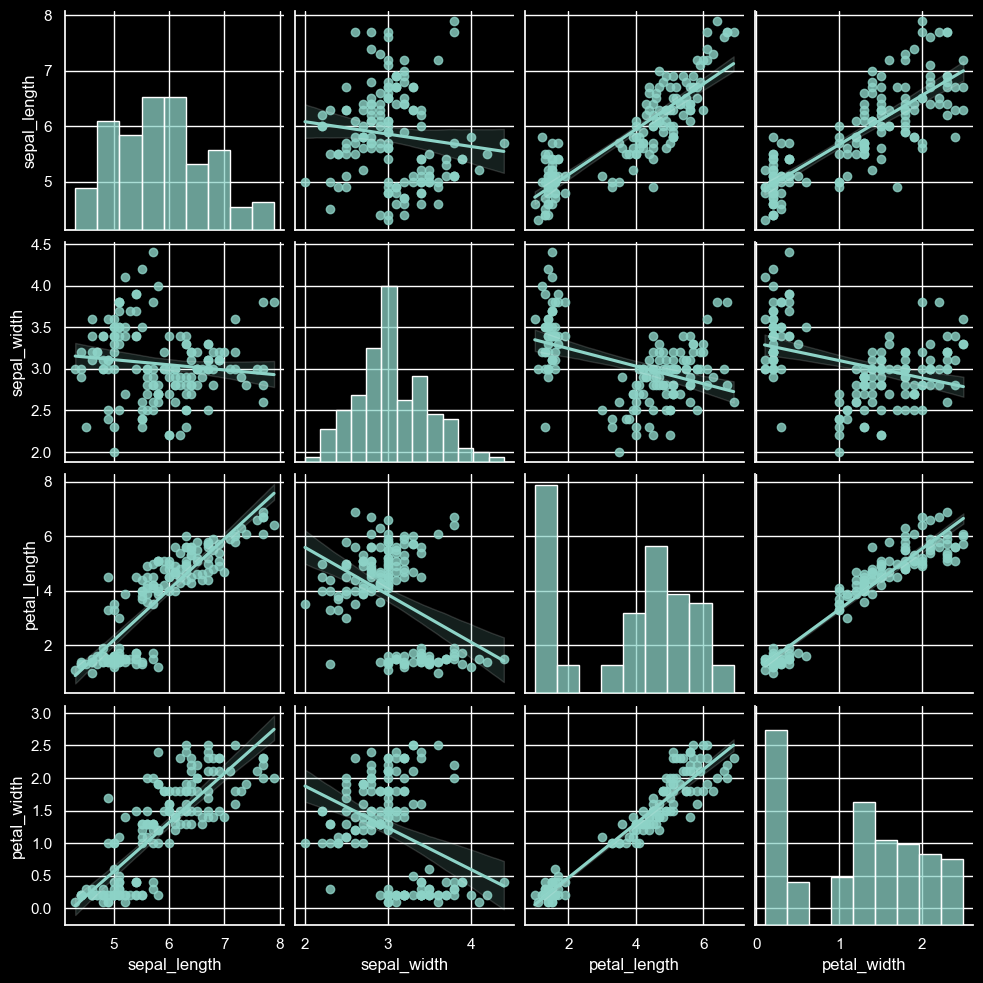

In [52]:
df = sns.load_dataset('iris')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()

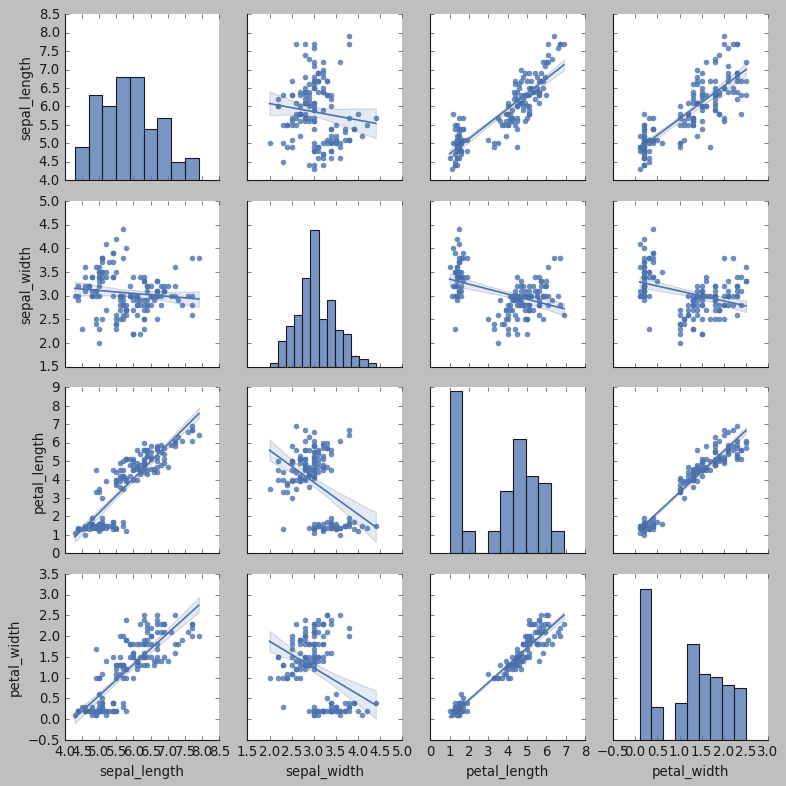

In [53]:
df = sns.load_dataset('iris')
plt.style.use('classic') 
# with regression
sns.pairplot(df, kind="reg")
plt.show()

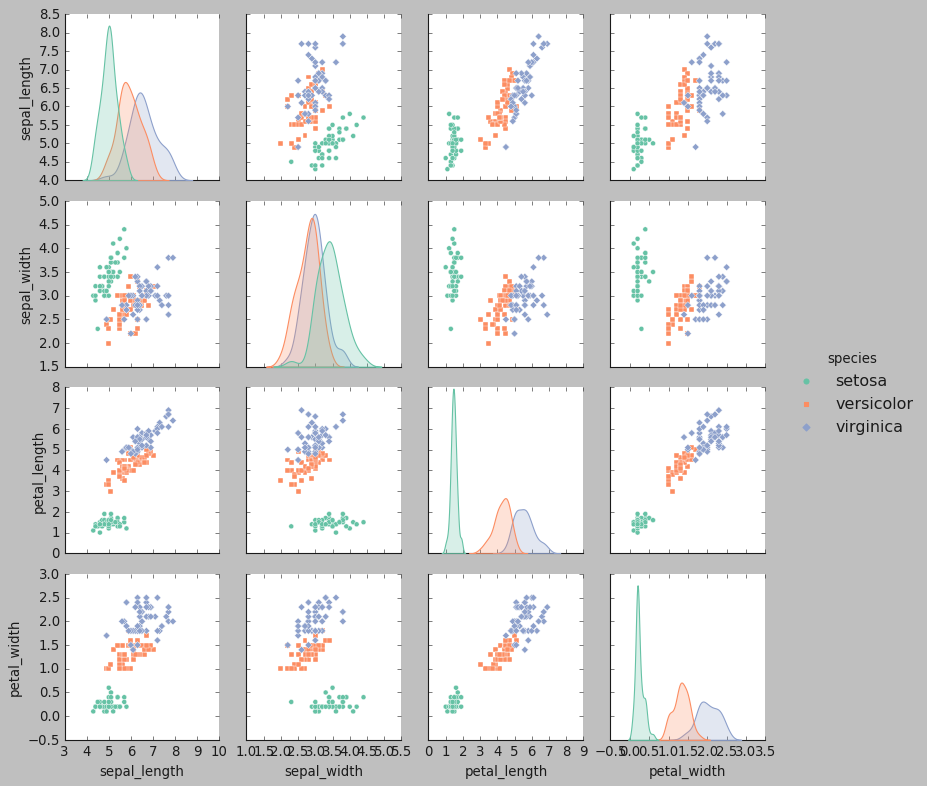

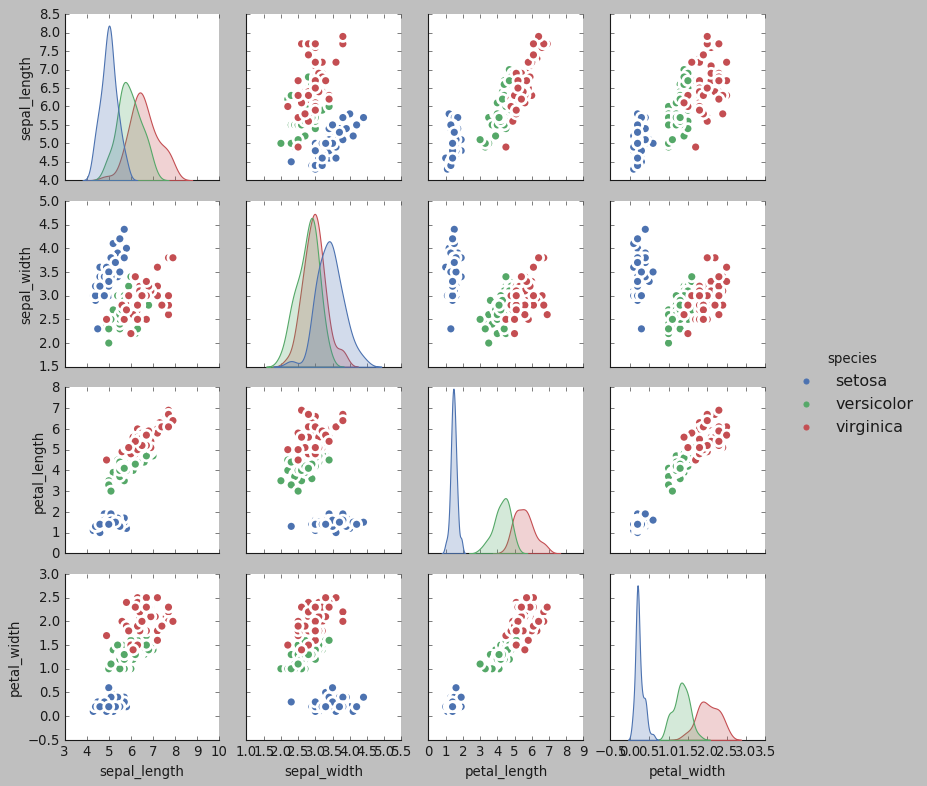

In [54]:
# left
sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()
 
# right: you can give other arguments with plot_kws.
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

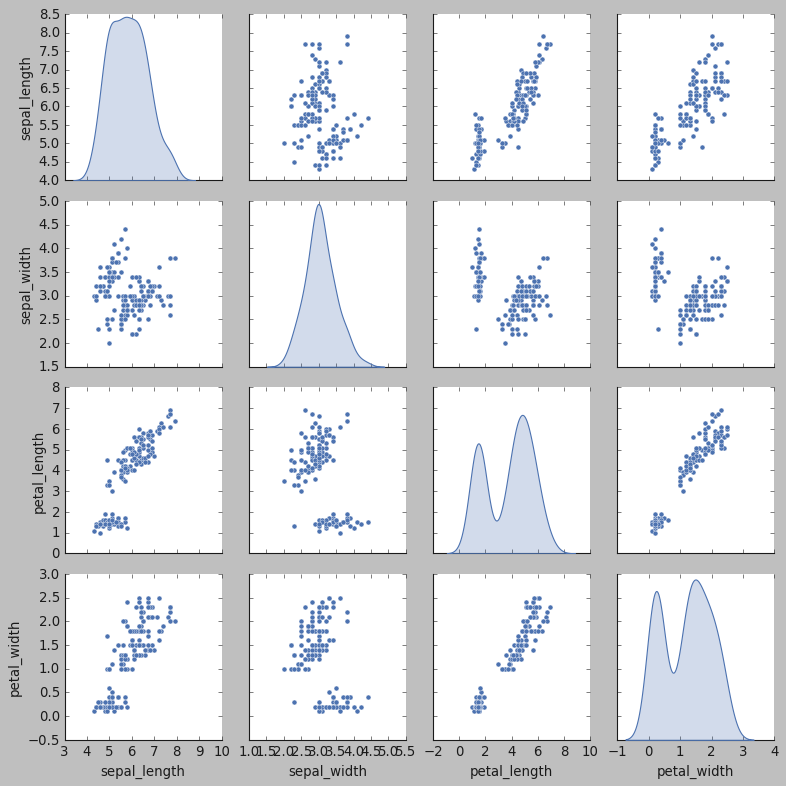

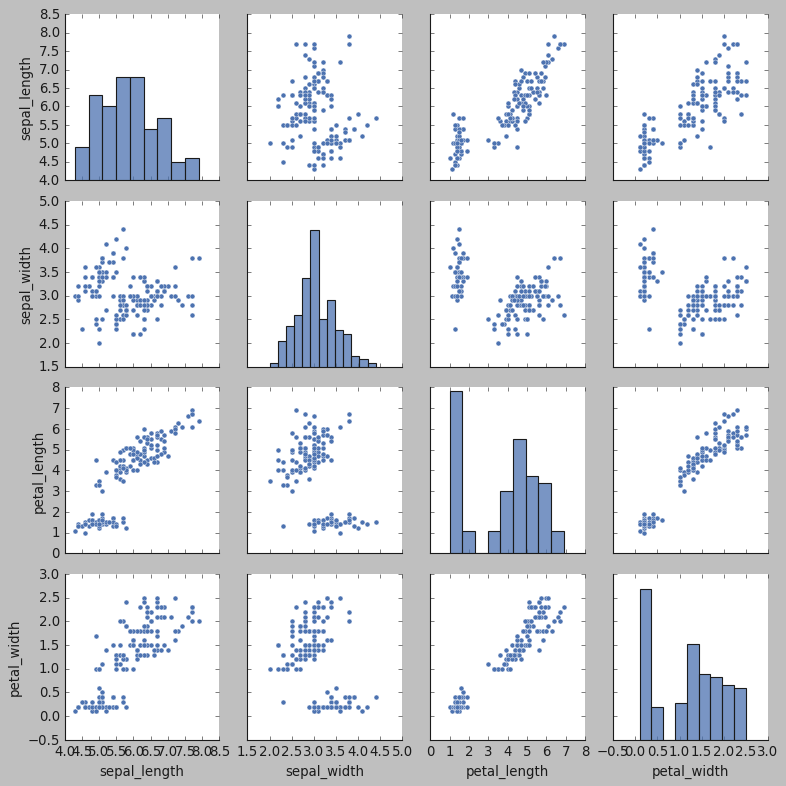

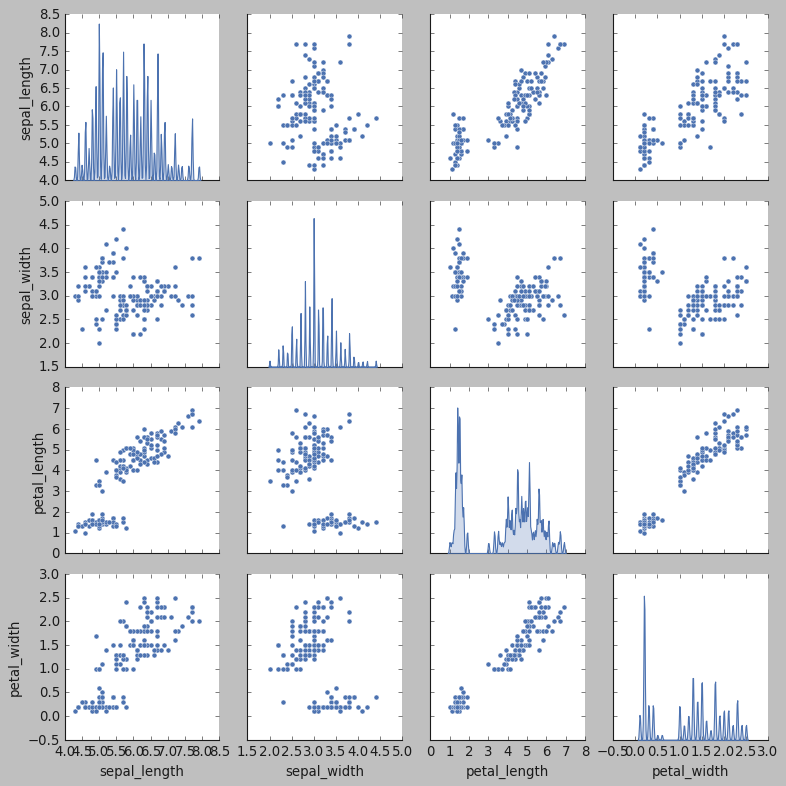

In [55]:
# Density
sns.pairplot(df, diag_kind="kde")
 
# Histogram
sns.pairplot(df, diag_kind="hist")
 
# You can custom it as a density plot or histogram so see the related sections
sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw_adjust=.05, vertical=False) )

plt.show()

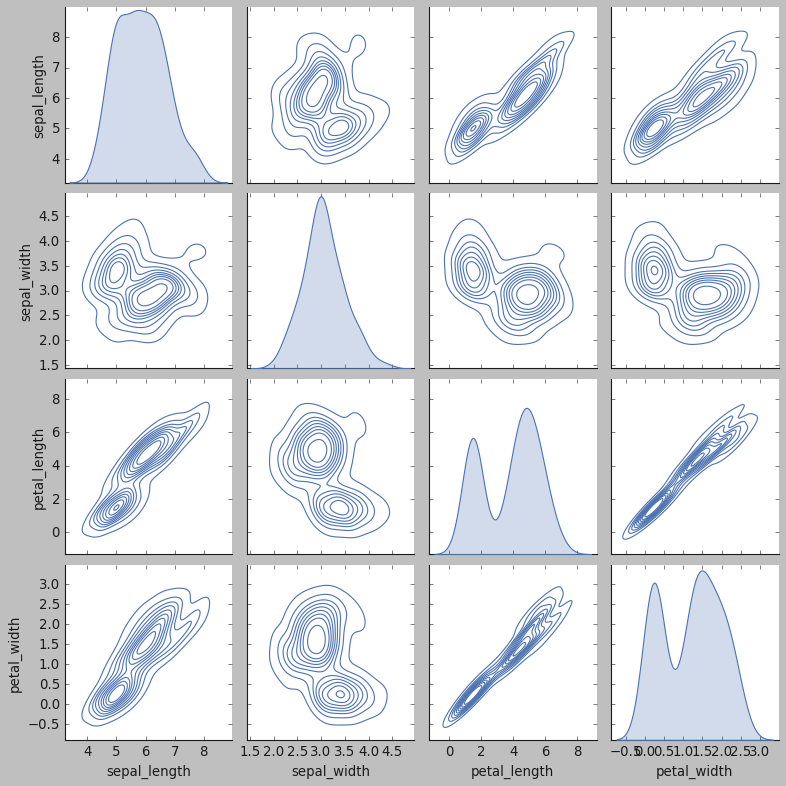

In [56]:
sns.pairplot(df, kind = "kde")

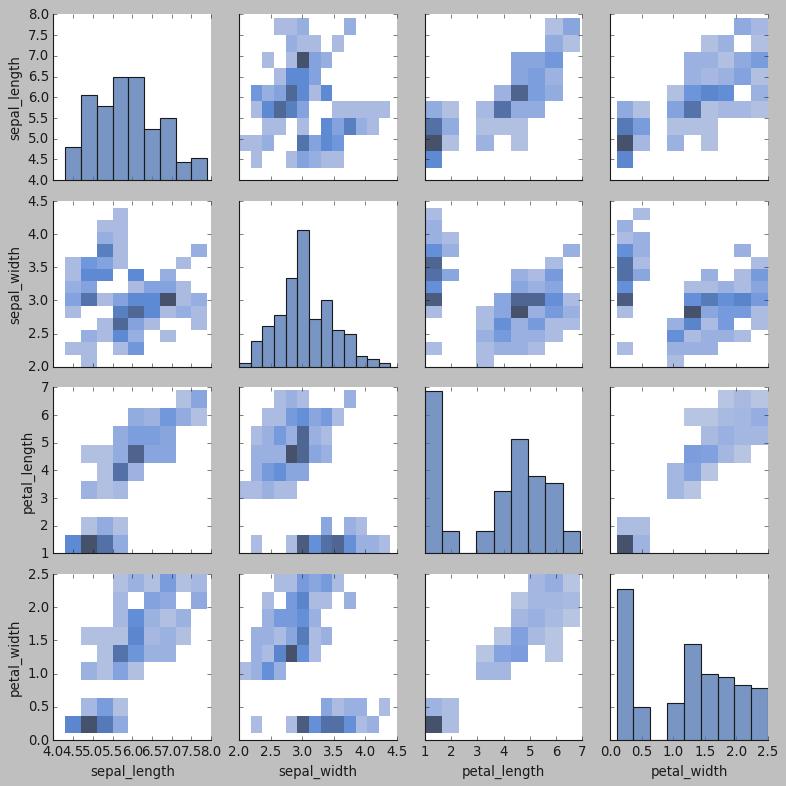

In [57]:
sns.pairplot(df, kind = "hist")

### Bubble Plot

**Notes & Resources/Links:**  
- *A bubble plot is a scatterplot where the circle size is mapped to the value of a third numeric variable.*
- https://www.data-to-viz.com/graph/bubble.html
- https://python-graph-gallery.com/bubble-plot/
- https://python-charts.com/correlation/bubble-chart-plotly/

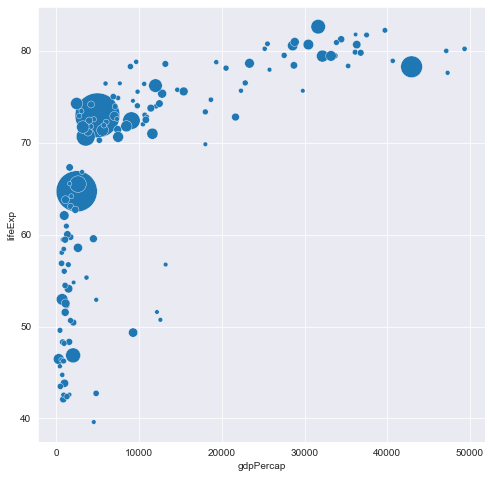

### Connected Scatterplot

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/connectedscatter.html
- https://python-graph-gallery.com/connected-scatter-plot/

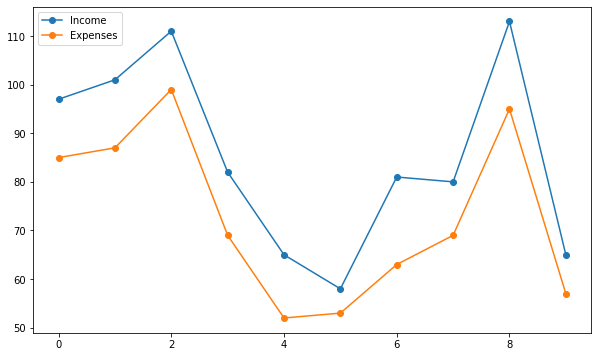

### 2D Density Charts (2D Histograms, Contour Plots, Hexbin Charts)

**Notes & Resources/Links:**  
- *There are several chart types allowing to visualize the distribution of a combination of 2 numeric variables. They always have a variable represented on the X axis, the other on the Y axis, like for a scatterplot.Then the number of observations within a particular area of the 2D space is counted and represented with a color gradient. The shape can vary: hexagones result in a hexbin chart, squares in a 2d histogram. A kernel density estimate can be used to get a 2d density plots or a contour plots*
- https://www.data-to-viz.com/graph/density2d.html
- https://python-graph-gallery.com/2d-density-plot/
- https://python-charts.com/correlation/2d-histogram-matplotlib/
- https://python-charts.com/correlation/2d-histogram-plotly/
- https://python-charts.com/correlation/contour-matplotlib/
- https://python-charts.com/correlation/hexbin-matplotlib/
- https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density/


***2D histograms with the hist2d() function***  
*2D histograms are useful when you need to analyse the relationship between 2 numerical variables that have a huge number of values. It is useful for avoiding the over-plotted scatterplots. The following example illustrates the importance of the bins argument. You can explicitly tell how many bins you want for the X and the Y axis.*

In [58]:
# create data
x = np.random.normal(size=50000)
y = x * 3 + np.random.normal(size=50000)

*Big bins*  
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)  
plt.show()
 
*Small bins*  
plt.hist2d(x, y, bins=(300, 300), cmap=plt.cm.jet)  
plt.show()
 
*If you do not set the same values for X and Y, the bins won't be a square!*  
plt.hist2d(x, y, bins=(300, 30), cmap=plt.cm.jet)  
plt.show()

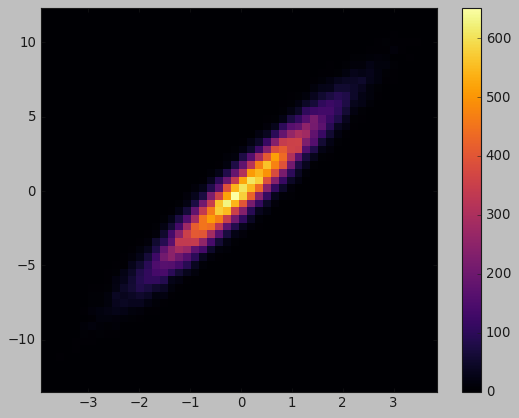

In [59]:
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.inferno)
plt.colorbar()
plt.show()

***Contour plots using Seaborn's kdeplot() function***

In [60]:
x

array([-0.33760295, -0.89731542,  0.14579555, ...,  1.94417513,
        0.28963877,  0.6177894 ])

In [61]:
df_xy = pd.DataFrame({'X':x,'Y':y})

In [62]:
df_xy

X         Y
0     -0.337603 -0.685209
1     -0.897315 -3.232691
2      0.145796  0.452141
3      0.517776  1.727031
4     -0.311274 -1.393984
...         ...       ...
49995  1.025099  3.663493
49996 -0.093392 -0.706365
49997  1.944175  4.608868
49998  0.289639 -0.756130
49999  0.617789  2.040228

[50000 rows x 2 columns]

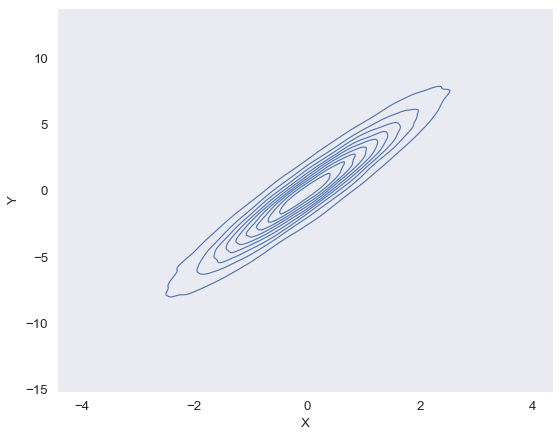

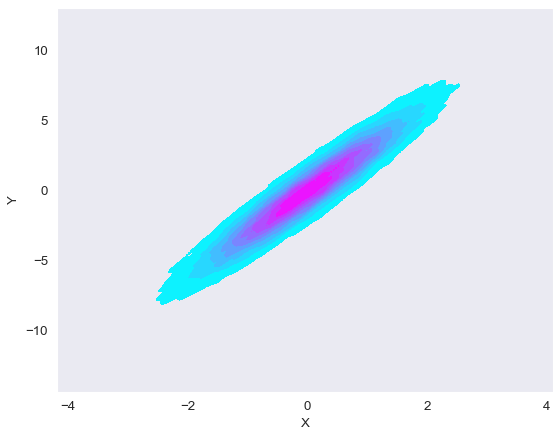

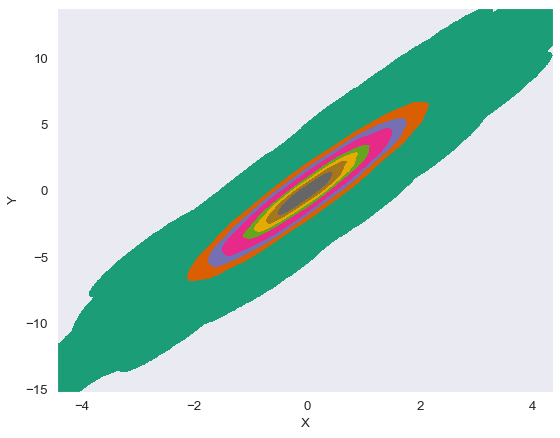

In [63]:
# set seaborn style
sns.set_style("dark")

# Basic 2D density plot
sns.kdeplot(x=df_xy["X"], y=df_xy["Y"])
plt.show()
 
# Custom the color, add shade and bandwidth
sns.kdeplot(x=df_xy["X"], y=df_xy["Y"], cmap="cool", shade=True, bw_adjust=.5)
plt.show()

# Add thresh parameter
sns.kdeplot(x=df_xy["X"], y=df_xy["Y"], cmap="Dark2", shade=True, thresh=0)
plt.show()

Here's a more concrete example: making [heatmaps](https://www.kaggle.com/code/josegabrielgonzalez/understat-series-heatmaps) of football players' shots across a given season: 

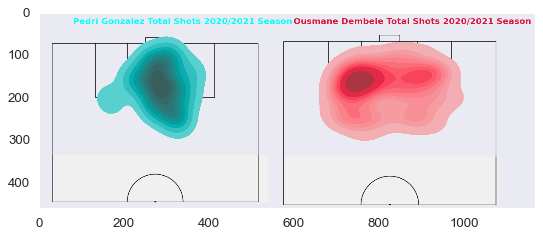

In [64]:
import matplotlib.pyplot as plt
from PIL import Image
import urllib
 
img = Image.open(urllib.request.urlopen('https://www.kaggleusercontent.com/kf/69711966/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..f31zi1ftgCwfkwMKXkjpYA.JCES1UsTnt2TA31QiZFRAztk05-Vrpp85Y61vAhZqlseCWbLdpl7PQw4GysYeMDBvm92CKw3ByheUL1XuF7ihBKuyGJSQojP5NgCKEXsKhTvz-zzmMVGvUH6j8hQ5yqXNEx3YrOIDZ4rdfCwqtTkvo3DBezAaFAQcpTq6IMNMfQbnC0yiTsEHzQwCzUQooQf7ZtOCL2HwICMJdP4mk9oTopLEqc5d0xrpNqPysjgPoydrqDfG5HHo5qMUFnsoLPAI5nyEhIZblY1IL_Z4LAMdSLTLeJ2uy58aDDvGqlmJCLGuXQbAqp0-ku7s6WDDZU9fLrCVosdExTg21LftA1_UONnWyXg2ZfYruWwBJ97zX1HM-HS7S2SM5QoXjaV_ubTzEGrJ4IHI7pQYE30sHXTkGt27D5qOn8pINW9ADhtOHxYyqjTr0pjWNo5MDPps0n1EFus7D6hmTGG9HAxk2puw7Q4LHQF8Li4Xatxnu2vmIvlOvvhLv6ffPUQQToJP0RHe-1YOF8v1QHrbXvo8jdf0ZQKTyFKvo33g3sp-64CYaG2RVSEBLqiICmIH3kvHZy7CYu6LooL7SnoflcmArunOJDfiiefj0IISVTe_Ha6LGdcsZRbVnpuahCQQOx93QmLldOjdxobGVgradT5g3YCXUWS_b7IhvSGLpHrzcOuEo42ZgsPPyZIifgGkulF2eVf.MfJSdAJUVPsiHACA8UV0cQ/__results___files/__results___28_2.png'))
 
# Plotting the image
plotimg = plt.imshow(img)

***2D Kernel Density Estimates with Matplotlib***

*Let’s consider that you want to study the relationship between 2 numerical variables with a lot of points. Then you can consider the number of points on each part of the plotting area and thus calculate a 2D kernel density estimate. It is like a smoothed histogram. Instead of a point falling into a particular bin, it adds a weight to surrounding bins.*

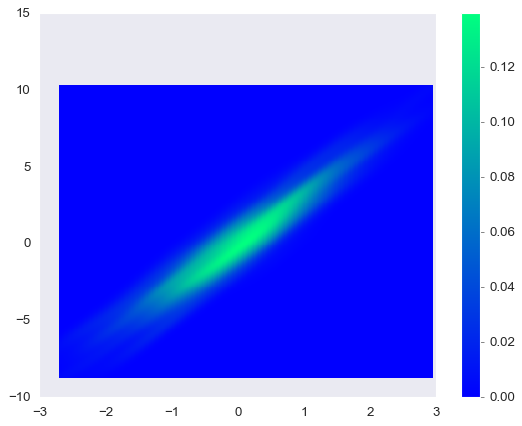

In [65]:
from scipy.stats import kde
 
# create data
x = np.random.normal(size=500)
y = x * 3 + np.random.normal(size=500)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto',
              cmap=plt.cm.winter)
plt.colorbar()
plt.show()

***2D Histograms with Plotly's density_heatmap() function + with added Marginal Plots***

In [66]:
# Sample data
np.random.seed(2)
x = np.random.normal(size = 500)
y = x + np.random.normal(size = 500) ** 2

fig = px.density_heatmap(x = x, y = y,
        title = 'Density heatmap',
        labels = {'x': 'X-axis', 'y': 'Y-axis'},
        nbinsx = 10, nbinsy = 10,#specify nmbr of bins
        color_continuous_scale = 'darkmint') #customize the color palette
fig.show()

In [67]:
fig.write_html(r"C:\Users\Al Raven\Pictures\Python data viz 101/density heatmap01.html")

In [68]:
# Sample data
np.random.seed(2)
x = np.random.normal(size = 500)
y = x + np.random.normal(size = 500) ** 2

fig = px.density_heatmap(x = x, y = y,
        title = 'Density heatmap',
        labels = {'x': 'X-axis', 'y': 'Y-axis'},
        nbinsx = 20, nbinsy = 20,#specify nmbr of bins
        marginal_x = 'violin', marginal_y = 'violin')#add marginal plot

fig.show()

In [69]:
fig.write_html(r"C:\Users\Al Raven\Pictures\Python data viz 101/density heatmap02.html")